In [30]:

import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib ipympl

In [17]:
x = np.linspace(0,1,1000)

### Understanding Beta Distribution

$f(x;\alpha,\beta) = \frac{1}{B(\alpha,\beta)} x^{\alpha-1}(1-x)^{\beta-1}$

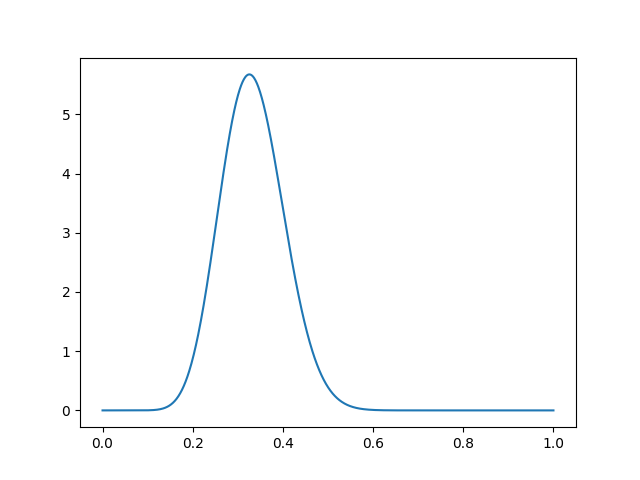

In [18]:
a = 15
b = 30
plt.cla()
dist = beta(a,b)
plt.plot(x,dist.pdf(x))
plt.show()

In [19]:
plt.cla()

### Thompson Sampling

In [20]:
arms = 4
pr = [0.8,0.78,0.76,0.62]
arms = [beta(1, 1),beta(1, 1),beta(1, 1),beta(1, 1)]
x = np.linspace(0,1,1000)
times_choosen = np.zeros(4)


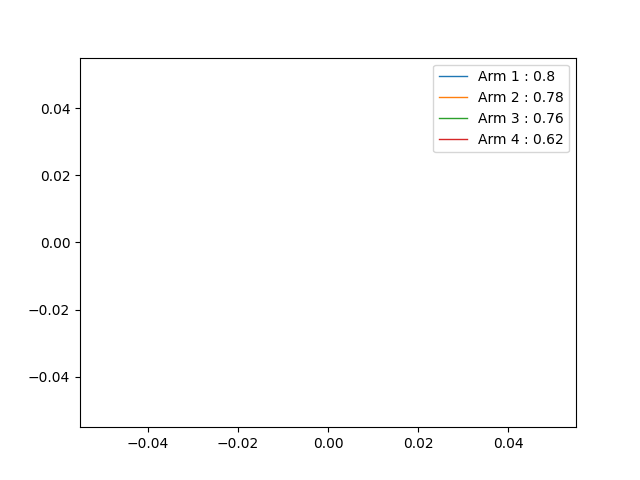

In [27]:
fig, ax = plt.subplots()
lines = []
simu_runs = 700000
for i in range(4):
    lines.append(ax.plot([], [], label=f'Arm {i + 1} : {pr[i]}', linewidth=1)[0])

def Thompson(frame):
    sampled_mean = []

    #Sampling Phase
    for arm in range(4):
        sampled_mean.append(arms[arm].rvs(size=1))
    choosen_arm = np.argmax(sampled_mean)

    #Choose the Arm
    reward = np.random.binomial(1, pr[choosen_arm])

    # Update the Distribution
    prev_alhpa,prev_beta = arms[choosen_arm].args
    arms[choosen_arm].args = (prev_alhpa + reward,prev_beta + 1 - reward)
    times_choosen[choosen_arm] += 1


    for j in range(4):
        pdf = arms[j].pdf(x)
        lines[j].set_data(x, pdf)
    ax.relim()
    ax.autoscale_view()
    return lines

plt.legend()
ani= FuncAnimation(fig, Thompson, frames=simu_runs, interval=25, repeat=False)
plt.show()


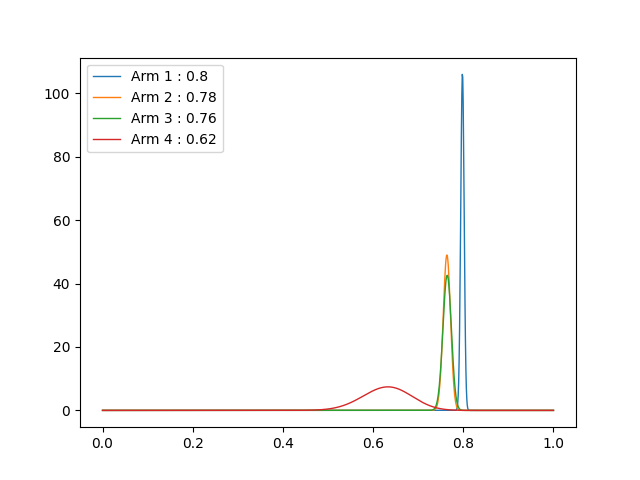

In [ ]:
plt.cla()
for i in range(10000 - (simu_runs + 1)):
    sampled_mean = []

    #Sampling Phase
    for arm in range(4):
        sampled_mean.append(arms[arm].rvs(size=1))
    choosen_arm = np.argmax(sampled_mean)

    #Choose the Arm
    reward = np.random.binomial(1, pr[choosen_arm])

    # Update the Distribution
    prev_alhpa,prev_beta = arms[choosen_arm].args
    arms[choosen_arm].args = (prev_alhpa + reward,prev_beta + 1 - reward)
    times_choosen[choosen_arm] += 1

for j in range(4):
    plt.plot(x, arms[j].pdf(x) ,label = f'Arm {j + 1} : {pr[j]}',  linewidth=1)

plt.legend()
plt.show()


### No of Picks of sub-optimal Arm

In [26]:
for i in range(4):
    print(f'Pick of arm {i + 1} : {times_choosen[i]}')

regret = 0
for i in range(4):
    regret = (np.max(pr) - pr[i])*times_choosen[i]

print("Regret : ", regret)

Pick of arm 1 : 11157.0
Pick of arm 2 : 2721.0
Pick of arm 3 : 2054.0
Pick of arm 4 : 79.0
Regret :  14.220000000000004


### Expected Mean of the arms


In [12]:
for i in range(4):
    a,b = arms[i].args
    print("Actual Mean :",pr[i], "Predicted Mean : ",a/(a + b))

Actual Mean : 0.8 Predicted Mean :  0.7990512584003162
Actual Mean : 0.78 Predicted Mean :  0.7765726681127982
Actual Mean : 0.76 Predicted Mean :  0.7572614107883817
Actual Mean : 0.62 Predicted Mean :  0.35294117647058826


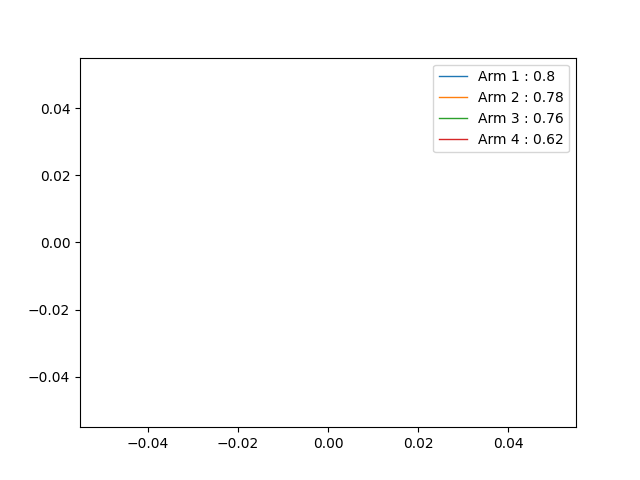

In [29]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

x = np.linspace(0,1,1000)

arms = [beta(1, 1) for _ in range(4)]
pr = [0.8, 0.78, 0.76, 0.62]
times_choosen = np.zeros(4)

fig, ax = plt.subplots()
lines = [ax.plot([], [], label=f'Arm {i + 1} : {pr[i]}', linewidth=1)[0] for i in range(4)]
plt.legend()

simu_runs = 200  # Reduced number of frames

def Thompson(frame):
    sampled_mean = [arm.rvs() for arm in arms]
    choosen_arm = np.argmax(sampled_mean)
    reward = np.random.binomial(1, pr[choosen_arm])
    a, b = arms[choosen_arm].args
    arms[choosen_arm] = beta(a + reward, b + 1 - reward)
    times_choosen[choosen_arm] += 1
    
    for j, arm in enumerate(arms):
        lines[j].set_data(x, arm.pdf(x))
    return lines

ani = FuncAnimation(fig, Thompson, frames=simu_runs, interval=100, blit=True)
plt.show()